In [1]:
import pandas as pd
from gensim import matutils, models
import scipy.sparse
import matplotlib.pyplot as plt
import logging
import re
import os
import numpy as np
import time
#from gensim.models.ldamulticore import LdaMulticore
### choose the callbacks classes to import
#from gensim.models.callbacks import PerplexityMetric, ConvergenceMetric, CoherenceMetric

C:\Users\minha\Anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
#apsth
saving_path="C:/Users/minha/Desktop/plots_new/updated/"

In [3]:
#Choosing number of topics
nTopics = 11

In [4]:
# Define topic names (11)
topic_names = topic_colors = ['lightcoral', 'darkturquoise', 'indigo', 'seagreen', 'tomato',
                   'steelblue', 'slategrey', 'firebrick', 'blueviolet', 'darkorchid',
                   'burlywood']

In [6]:
#reading necessary inputs for lda from pickle
import pickle as pkl

with open('pickled_1907/data_lemmatized.pkl', 'rb') as f:
    data_lemmatized = pkl.load(f)

with open('pickled_1907/cleaned_corpus.pkl', 'rb') as f:
    corpus = pkl.load(f)
with open("pickled_1907/id2word.pkl", 'rb') as f:
    id2word= pkl.load(f)

In [7]:
with open('pickled_1907/raw_corpus.pkl', 'rb') as f:
    corpus_df = pkl.load(f)

In [8]:
#from gensim.models import LdaModel
from gensim.models import LdaModel
nTopics =11
# Load model
lda_model = LdaModel.load(f'pickled_1907/trained_models/trained_lda_model_{nTopics}.model')

In [9]:
#topic distribution
distribution_file_name = f'pickled_1907/topic_distribution//topic_distributions_{nTopics}.npy'
topic_distributions = np.load(distribution_file_name)

In [10]:
#topic_distributions.shape

In [11]:
#finding articles per topics
#topic = 7
#topic_idx = (-topic_distributions[:,topic]).argsort()
#corpus_df.loc[topic_idx[:100],'Article Title'].to_csv(f'pickled_1907/investigation/topic_{topic}.csv')

In [12]:
# Pull topics
topics = lda_model.show_topics(formatted=False, num_topics=nTopics, num_words=20)

In [13]:
years = np.unique(corpus_df['Year'])
plot_years=[]
for y,year in enumerate(years):
    hm_year = topic_distributions[corpus_df['Year'] == year,:]
    if hm_year.shape[0]>40:
        plot_years.append(year)
        
topic_distributions_by_year = np.zeros([len(plot_years), lda_model.num_topics])
for y, year in enumerate(plot_years):
    hm_year = topic_distributions[corpus_df['Year'] == year,:]
    topic_distributions_by_year[y,:] = np.sum(hm_year, axis=0) / np.sum(hm_year)

In [14]:
#topic_distributions_by_year

In [15]:
#topic_distributions_by_year[:,3].shape

In [16]:
#Some basic parameters of plotting
font = {'family' : "Arial",
         'weight' : 'normal',
         'size'   : 12}
plt.rc('font', **font)

In [17]:
topic_colors = ['steelblue','darkorchid', 'seagreen','slategrey','darkturquoise','tomato','lightcoral',
                  'indigo','burlywood','blueviolet','firebrick']

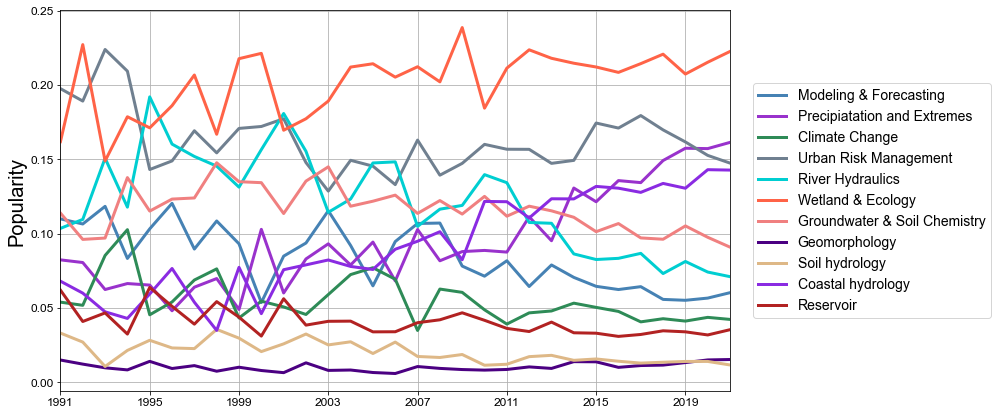

In [18]:
# Plot time series dependednt from each other
fig, ax1 = plt.subplots(figsize=(12,7))
#gs = fig.add_gridspec(1,4)

#ax1 = fig.add_subplot(gs[0, :3])
for i in range(lda_model.num_topics):
    color = topic_colors[i] 
    pltcolor = color
    ax1.plot(plot_years, topic_distributions_by_year[:,i], 
             c=pltcolor, linewidth=3, label=topic_names[i])
ax1.set_xticks(plot_years[::4])
ax1.set_xlim([plot_years[0], plot_years[-1]])
ax1.set_ylabel('Popularity', fontsize=20)
#ax1.set_title('Topic trend', fontsize=28)
plt.legend(loc="center right", bbox_to_anchor=(1.40, 0.5),fontsize=14)
ax1.grid()
plt.savefig(saving_path+"Topic_trends_ "+ time.strftime("%Y-%m-%d %H%M") + ".png",dpi=150,bbox_inches="tight")

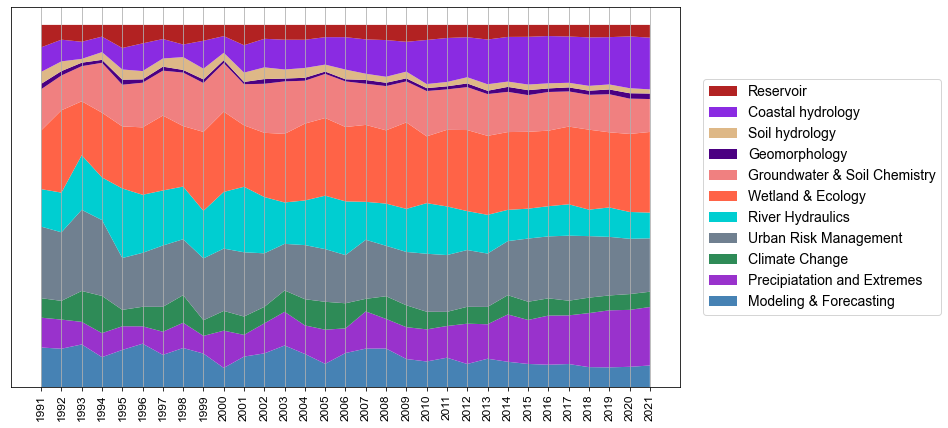

In [19]:
# Plot relative time series dependent to each other
fig,ax = plt.subplots(figsize=(12,7))
#gs = fig.add_gridspec(1,4)

#ax1 = fig.add_subplot(gs[0, :3])
ax.stackplot(plot_years, topic_distributions_by_year.transpose(),labels=topic_names, colors=topic_colors)
# ax1.legend(topic_names, loc='center right', shadow=True)
plt.xticks(plot_years[::-1])
#plt.set_xlim([plot_years[0], 2022])
plt.xticks(rotation="vertical")
plt.yticks([])
#ax1.set_ylim(0, 1)
#ax1.set_ylabel('Popularity', fontsize=16)
#plt.title('Topic Activation over time', fontsize=22)
plt.grid()

#ax0 = fig.add_subplot(gs[0, 3])
#ax0.stackplot(plot_years, topic_distributions_by_year.transpose(),labels=topic_names, colors=list(custom_colors.values()))
current_handles, current_labels = plt.gca().get_legend_handles_labels()
# sort or reorder the labels and handles
reversed_handles = list(reversed(current_handles))
reversed_labels = list(reversed(current_labels))
plt.legend(reversed_handles,reversed_labels,loc='center right', shadow=False, fancybox = True,bbox_to_anchor=(1.40, 0.5),fontsize=14)
#plt.legend(topic_names, loc='center right', shadow=True, fancybox = True,bbox_to_anchor=(1.3, 0.5))
#ax0.axis('off')
plt.savefig(saving_path+"relative_topic_trends "+ time.strftime("%Y-%m-%d %H%M") + ".png",dpi=150, bbox_inches="tight")
#plt.savefig("C:/Users/minha/Desktop/plots/pic activationtopic_11_2608.jpg",dpi=300,bbox_inches="tight")

### Individual time series plot

In [20]:
from gensim.models import LdaModel
import pickle as pkl
import numpy as np
from nltk.corpus import stopwords
from wordcloud import WordCloud 
from matplotlib import pyplot as plt

In [21]:
### emerging topic
# calculate time series
years = np.unique(corpus_df['Year'])
topic_distributions_by_year = np.zeros([len(years), lda_model.num_topics])
for y, year in enumerate(years):
    hm_year = topic_distributions[corpus_df['Year'] == year,:]
    topic_distributions_by_year[y,:] = np.sum(hm_year, axis=0) / np.sum(hm_year)

In [22]:
# create wordclouds
stop_words = stopwords.words('english')
cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=3500,
                  height=3500,
                  max_words=15,
                  color_func=lambda *args, **kwargs: colorlist[t],
                  prefer_horizontal=1.0)

In [23]:
# Pull topics
topics = lda_model.show_topics(formatted=False, num_topics=nTopics, num_words=20)

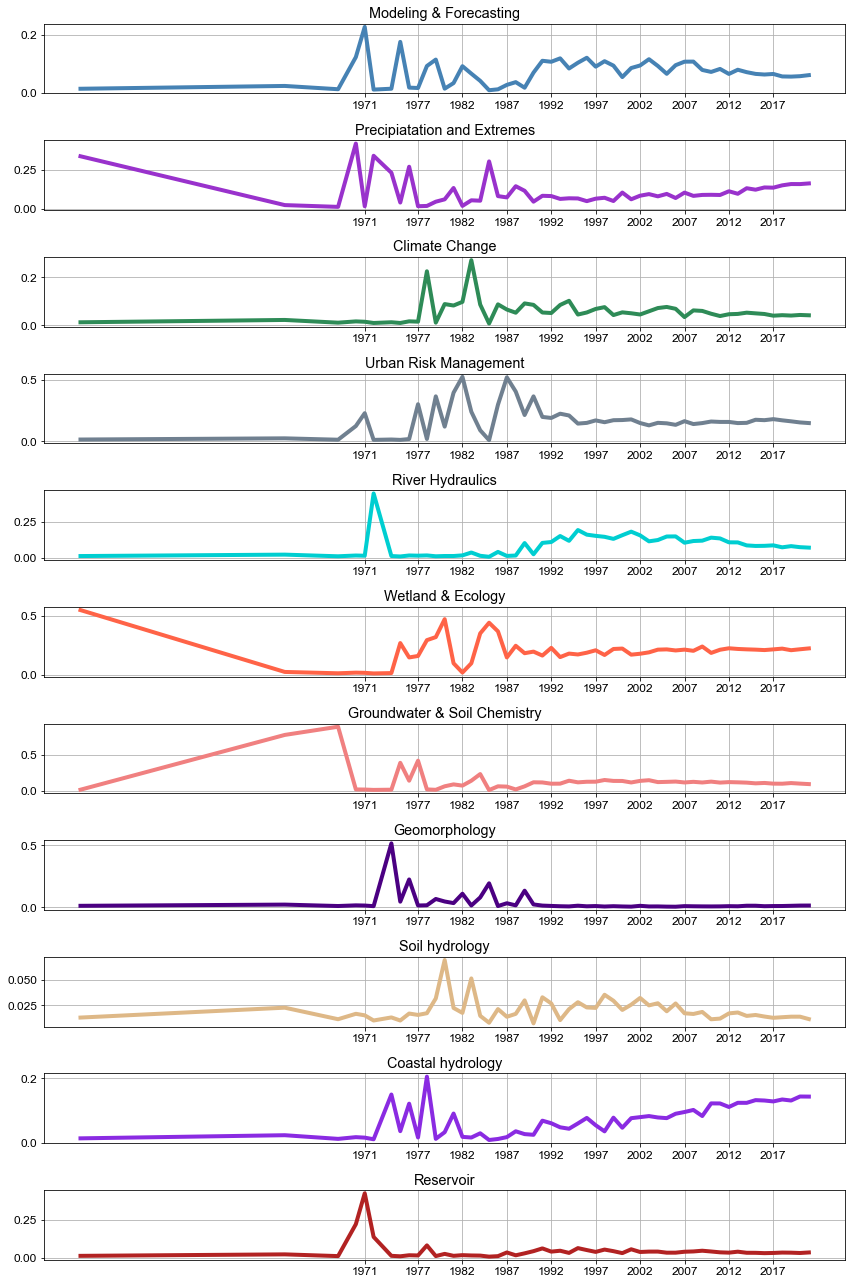

In [24]:
# Plot wordclouds and scaled time series
fig = plt.figure(figsize=(12, 18))
#fig, ax1 = plt.subplots(ncols=4, nrows=3, constrained_layout=True)
gs = fig.add_gridspec(nTopics,1)
for t in range(nTopics):
    if t < 12:
        # plot time series
        ax1 = fig.add_subplot(gs[t, 0:])
        ax1.plot(years, topic_distributions_by_year[:,t], color=topic_colors[t], linewidth=4)
        ax1.set_title(topic_names[t])
        ax1.set_xticks(years[4::5])
       # ax1.set_ylabel('Popularity')
        ax1.grid()
    
    
fig.tight_layout()

# Save figure
plt.savefig(saving_path+"wordclouds_and_trends"+time.strftime("%Y-%m-%d %H%M")+".png",dpi=300)